In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [16]:
# https://www.kaggle.com/datasets/komalnaseer/fuelconsumptioncsv
df = pd.read_csv('./../data/FuelConsumption.csv')

In [17]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
514,2014,HYUNDAI,SONATA,FULL-SIZE,2.4,4,A6,X,9.8,7.0,8.5,33,196
635,2014,LAMBORGHINI,GALLARDO COUPE,TWO-SEATER,5.2,10,M6,Z,20.6,13.5,17.4,16,400
392,2014,FORD,FIESTA,SUBCOMPACT,1.6,4,AS6,X,8.5,6.5,7.6,37,175
233,2014,CHEVROLET,MALIBU,MID-SIZE,2.0,4,AS6,Z,11.5,7.9,9.9,29,228
50,2014,AUDI,R8 SPYDER,TWO-SEATER,5.2,10,A7,Z,18.8,11.3,15.4,18,354


In [18]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
# drop non-numeric columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_COMB_MPG'], axis=1)

In [ ]:
# CYLINDERS, ENGINESIZE are highly correlated
# ENGINESIZE are more correlated with CO2EMISSIONS
# FUEL series are highly correlated with each other
# FUELCONSUMPTION_CITY is the most correlated feature with CO2EMISSIONS
# => choose ENGINESIZE, FUELCONSUMPTION_CITY
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


In [21]:
df = df[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']]

In [22]:
X = df.loc[:, ['ENGINESIZE', 'FUELCONSUMPTION_CITY']].values
y = df.loc[:, 'CO2EMISSIONS'].values

In [25]:
# standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=37)

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [25.55624256 35.92198245]
Intercept: 256.77812200435415


In [29]:
# get original coefficients
mean = scaler.mean_
std_devs_ = np.sqrt(scaler.var_)

coef_orig = model.coef_ / std_devs_
intercept_orig = model.intercept_ - np.sum((mean * coef_orig) / std_devs_)

print('Original Coefficients:', coef_orig)
print('Original Intercept:', intercept_orig)

Original Coefficients: [18.05799569  8.76288897]
Original Intercept: 185.65701995956596


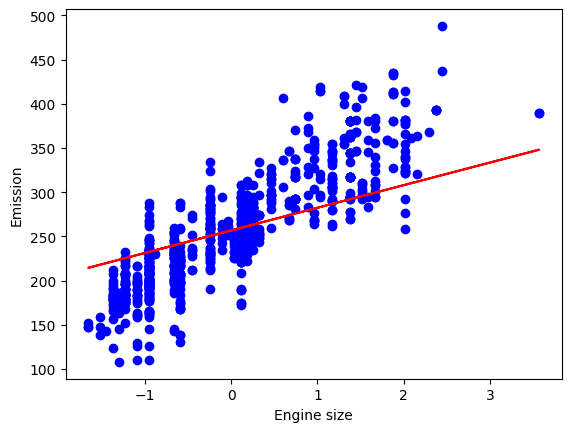

In [30]:
plt.scatter(X_train[:, 0], y_train, color='blue')
plt.plot(X_train[:, 0], model.coef_[0] * X_train[:, 0] + model.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

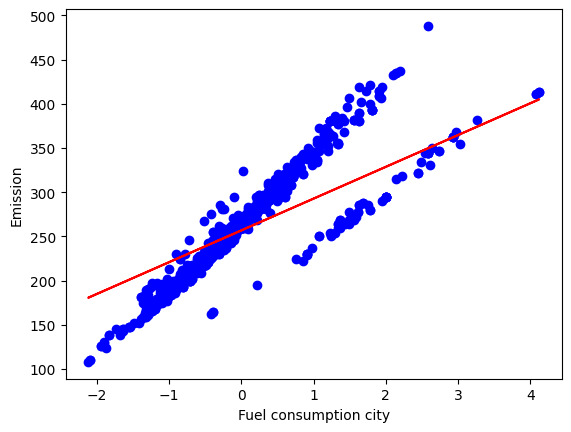

In [31]:
plt.scatter(X_train[:, 1], y_train, color='blue')
plt.plot(X_train[:, 1], model.coef_[1] * X_train[:, 1] + model.intercept_, '-r')
plt.xlabel('Fuel consumption city')
plt.ylabel('Emission')
plt.show()

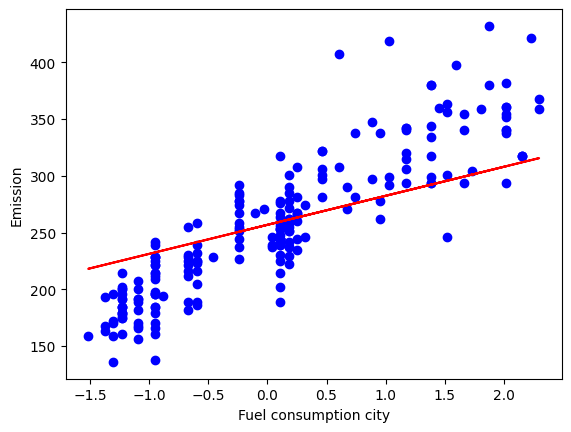

In [33]:
plt.scatter(X_test[:, 0], y_test, color='blue')
plt.plot(X_test[:, 0], model.coef_[0] * X_test[:, 0] + model.intercept_, '-r')
plt.xlabel('Fuel consumption city')
plt.ylabel('Emission')
plt.show()

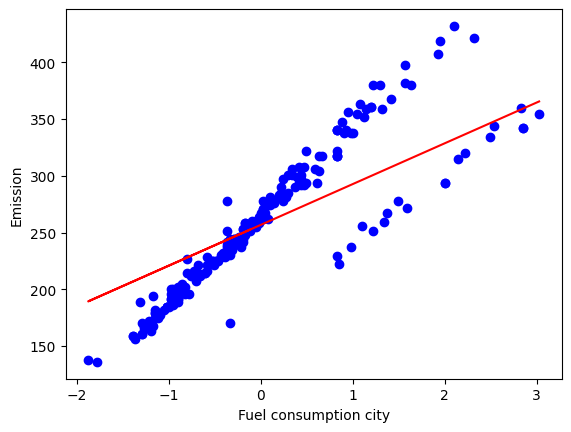

In [34]:
plt.scatter(X_test[:, 1], y_test, color='blue')
plt.plot(X_test[:, 1], model.coef_[1] * X_test[:, 1] + model.intercept_, '-r')
plt.xlabel('Fuel consumption city')
plt.ylabel('Emission')
plt.show()